## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability



In [93]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [94]:
df=pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [95]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [96]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [97]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [98]:
df_T_no_match=df[df['group']=='treatment']

In [99]:
df_T_no_match[df_T_no_match['landing_page']!='new_page'].count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [100]:
df_C_no_match=df[df['group']=='control']

In [101]:
df_C_no_match[df_C_no_match['landing_page']=='new_page'].count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

#Times treatment and new_page do not match <br>
1928+1965=3893

f. Do any of the rows have missing values?

In [102]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [103]:
df2=pd.concat([df_C_no_match[df_C_no_match['landing_page']=='old_page'],df_T_no_match[df_T_no_match['landing_page']=='new_page']]) 

In [104]:
df2.sample(10)

,user_id,timestamp,group,landing_page,converted
272597,767282,2017-01-19 06:02:27.948125,control,old_page,0
20327,720165,2017-01-17 00:20:37.177889,control,old_page,0
126627,868578,2017-01-06 21:45:05.655863,treatment,new_page,0
140406,935107,2017-01-12 17:21:26.813095,control,old_page,1
232260,710891,2017-01-18 12:48:17.430273,treatment,new_page,0
117555,741974,2017-01-03 15:50:24.802834,treatment,new_page,0
44343,705151,2017-01-05 23:32:31.754622,treatment,new_page,0
50019,730655,2017-01-14 10:44:24.317554,control,old_page,0
76765,664088,2017-01-09 09:37:13.879373,control,old_page,0
156687,927839,2017-01-11 18:38:20.141468,control,old_page,0


In [105]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [106]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [107]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [108]:
userid_duplicated=df2[df2['user_id'].duplicated()]

In [109]:
#Displacying the duplicated user id 
userid_duplicated['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [110]:
userid_duplicated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [111]:
df2=df2[df2['user_id']!=773192]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [112]:
df2['converted'].mean()

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [113]:
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [114]:
df2[df2['group']=='treatment']['converted'].mean()

0.11880888313869065

d. What is the probability that an individual received the new page?

In [115]:
df2[df2['landing_page']=='new_page'].count()/df2['landing_page'].count()

user_id         0.50006
timestamp       0.50006
group           0.50006
landing_page    0.50006
converted       0.50006
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

For the above evidence we see  that the control group had a slightly bigger probability of converting. <br>

We also see here that both the pages where shown to equal number of people <br>

Thus from above we do not have evidence to say treatment page leads to more conversion rather at this point its the other way round  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**<br>

Null Hypothesis Pnew-Pold<=0 <br>
Alternative Hypothesis Pnew-Pold> 0  <br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [147]:
#Sample Size
df[df['converted']==True]['converted'].count()

35237

In [148]:
pnew=df[df['landing_page']=='new_page']['converted'].mean()

In [149]:
pnew

0.11884079625642663

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [ ]:
# pold should be same as the pnew under the null since both valus are same equal to the converted value in ab_data.csv

In [164]:
pold=pnew

In [165]:
df2_diff= pnew-df[df['landing_page']=='old_page']['converted'].mean()

c. What is $n_{new}$, the number of individuals in the treatment group?

In [122]:
df2[df2['group']=='treatment']['group'].value_counts()

treatment    145309
Name: group, dtype: int64

d. What is $n_{old}$, the number of individuals in the control group?

In [123]:
df2[df2['group']=='control']['group'].value_counts()

control    145274
Name: group, dtype: int64

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [150]:
new_page_converted=[]
sample=df2.sample(145309,replace=True)
new_page_converted.append(sample[sample['landing_page']=='new_page']['converted'])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [151]:
old_page_converted=[]
#for i in range(10000):
sample=df2.sample(145274,replace=True)
old_page_converted.append(sample[sample['landing_page']=='old_page']['converted'])
    

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [159]:
ds=np.mean(new_page_converted)-np.mean(old_page_converted)

In [162]:
ds=

-0.0012817644895481567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [167]:
old_page,new_page,p_diff=[],[],[]
for _ in range(10000):
    sample=df.sample(34237,replace=True)
    old_page=sample[sample['landing_page']=='old_page']['converted'].mean()
    new_page=sample[sample['landing_page']=='new_page']['converted'].mean()
    p_diff.append(old_page-new_page)   


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

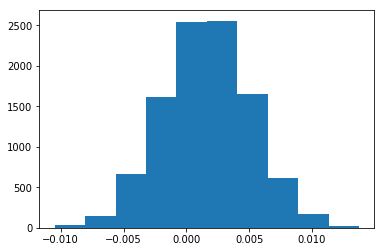

In [168]:
plt.hist(p_diff);
#Yes I expected a normal distribution and this the difference in mean is normally distributed 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [169]:
(p_diff>df2_diff).mean()

0.82479999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

A) What we have computed here is called the p- value . This value gives us the probabilty of null hypothesis being true . As the computed value is pretty high we can conclude that this distribution indeed came from the null . Thus we fail to reject our null hypothesis . Hence we conclude that pnew=pold 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:

convert_old = df2[df2['landing_page']=='old_page']
convert_old=convert_old[convert_old['converted']==1]['converted'].sum()
convert_new = df2[df2['landing_page']=='new_page']
convert_new=convert_new[convert_new['converted']==1]['converted'].sum()
n_old =df2[df2['landing_page']=='old_page']['user_id'].value_counts().sum()
n_new = df2[df2['landing_page']=='new_page']['user_id'].value_counts().sum()

In [40]:
import statsmodels

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [139]:
statsmodels.stats.proportion.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')

(1.3102408579271012, 0.90494281611597494)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Here Z score means how many standard deviation away from the center the value is . As the Z score is 1.3 we can conclude the value is not too away from the mean on zero .

Also here p value is high 0.19> 0.05 thus we can conclude that the null is true . Thus they argee with the bootstraping method above. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should perform Logistic regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [43]:
df2['intercept']=1
df_logi=df2.copy()

In [44]:
df_logi.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [45]:
df_logi[['new_page','old_page']]=pd.get_dummies(df_logi['landing_page'])

In [46]:
df_logi.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
#defining and fitting the model 
logistic_model=sm.Logit(df_logi['converted'],df_logi[['intercept','new_page']])
logistic_model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:               8.068e-06
Time:                        04:20:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.310      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
#Summary Provided above 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The null and alternate hypothesis for bootstraping are as below 

Null = Pnew= pold 
Alternate  Pnew != Pold 

this is like two sided test 

The null and alternate hypothesis for logistic regression  are as below 

Null  Pnew <= pold 
Alternate  Pnew > Pold 

This is like one sided test 

due to this reason we see smaller value for the p value in regression model 

Answer p value os 0.190

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 

A.The first case we only considered the landing page to see how it affects conversion but only one variable is not able to capture the entire degree of variability in the dependent variable so it is a good idea to add few more varibles into it . 

The only time i think adding more vairables is not beneficial is when they are highly corelated to one another which can cause multicolinearilty.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  

By adding the country column I do not see any increase in the end result. I have added the logistic regression model created from sklearn to show the statistic proof

In [49]:
countries=pd.read_csv('./countries.csv')

In [50]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [52]:
#checking for duplicates 
countries['user_id'].duplicated().sum()

0

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
df2_logi=df2.set_index('user_id').join(countries.set_index('user_id'))

In [54]:
df2_logi.head()

,timestamp,group,landing_page,converted,intercept,country
user_id,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,US
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,US
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,US


In [55]:
#creating duminy variables 
df2_logi[['new_page','old_page']]=pd.get_dummies(df2_logi['landing_page'])

In [56]:
df2_logi.head()

,timestamp,group,landing_page,converted,intercept,country,new_page,old_page
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,US,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,US,0,1
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,US,0,1


In [57]:
df2_logi['country'].unique()
df2_logi[['US','CA','UK']]=pd.get_dummies(df2_logi['country'])

In [58]:
logistic_model=sm.Logit(df2_logi['converted'],df2_logi[['intercept','new_page','US','CA']])
logistic_model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:               2.322e-05
Time:                        04:20:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.306      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.129      -0.093       0.012
CA             0.0099      0.013      0.743      0.458      -0.016       0.036
==============================================================================
"""

In [59]:
#To understand the whether adding country improved the logistic regression model or not

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
Logit=LogisticRegression()

In [62]:
df_logi.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1


In [63]:
X=np.array(df_logi['new_page']) # using only new_page as group and new_page are co-related columns 
y=np.array(df_logi['converted'])


In [64]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [67]:
model=Logit.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
result=model.predict(x_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,result))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     76927
          1       0.00      0.00      0.00     10248

avg / total       0.78      0.88      0.83     87175



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
# Building classifies by adding country column 

In [72]:
X=df2_logi[['US','CA','new_page']]
y=df2_logi['converted']


In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [74]:
model2=Logit.fit(x_train,y_train)

In [75]:
result2=model2.predict(x_test)

In [76]:
print(classification_report(y_test,result2))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     76927
          1       0.00      0.00      0.00     10248

avg / total       0.78      0.88      0.83     87175



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion 

The new page is not better than the old page hence the e-commerce company should stick to the old page itselg

In [170]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0